# Support Vector Regression

## Importing the libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [28]:
# Enter the name of your dataset here.csv
dataset = pd.read_csv('R01_students_performance.csv')
dataset.head(10)

,Study Hours (X),Exam Scores (Y)
0,1.5,60
1,2.0,65
2,2.5,73
3,3.0,75
4,2.0,62
5,3.5,85
6,4.0,92
7,3.0,78
8,1.8,63
9,4.5,95


## Splitting the dataset into the Training set and Test Set

In [29]:
X = np.array(dataset.iloc[:,:-1])
y = np.array(dataset.iloc[:, -1])
y = y.reshape(len(y), 1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Polynomial Linear Regression model on the Training set

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [32]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[67.25 70.  ]
 [77.49 80.  ]
 [71.61 70.  ]
 [89.53 89.  ]
 [69.78 73.  ]
 [83.48 84.  ]
 [65.41 61.  ]
 [70.67 74.  ]
 [85.05 87.  ]
 [65.41 62.  ]]


## Evaluating the Model Performance

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9151838193810552

# Visualisasi Model

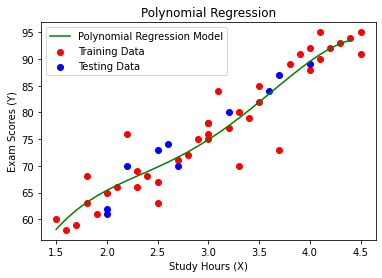

In [40]:
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regressor.predict(poly_reg.transform(X_grid)), color='green', label='Polynomial Regression Model')
plt.title('Polynomial Regression')
plt.xlabel('Study Hours (X)')
plt.ylabel('Exam Scores (Y)')
plt.legend()
plt.show()